# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
#  2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = total_fares / ride_count

In [7]:
#  5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fares / driver_count

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df ["Total Rides"] = ride_count
pyber_summary_df ["Total Drivers"] = driver_count
pyber_summary_df ["Total Fares"] = total_fares
pyber_summary_df ["Average Fare per Ride"] = avg_fare_ride
pyber_summary_df ["Average Fare per Driver"] = avg_fare_driver
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
#  Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#  9. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_bydate_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [13]:
#  10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fares_bydate_df = total_fares_bydate_df.reset_index()

In [14]:
#  11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
#  to get the total fares for each type of city by the date. 
total_fares_bydate_pivot = total_fares_bydate_df.pivot(index="date", columns="type", values="fare")
total_fares_bydate_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [15]:
#  12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
total_fares_specified_date_df = total_fares_bydate_pivot.loc["2019-01-01":"2019-04-28"]
total_fares_specified_date_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-04-27 14:11:38,NaN,NaN,37.60
2019-04-27 14:37:32,NaN,45.77,NaN
2019-04-27 14:57:38,NaN,NaN,44.73
2019-04-27 16:20:00,NaN,NaN,6.62
2019-04-27 16:22:23,NaN,NaN,25.67
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06


In [16]:
total_fares_specified_date_df.index.astype

<bound method Index.astype of Index(['2019-01-01 00:08:16', '2019-01-01 00:46:46', '2019-01-01 02:07:24',
       '2019-01-01 03:46:50', '2019-01-01 05:23:21', '2019-01-01 09:45:36',
       '2019-01-01 12:32:48', '2019-01-01 14:40:14', '2019-01-01 14:42:25',
       '2019-01-01 14:52:06',
       ...
       '2019-04-27 14:11:38', '2019-04-27 14:37:32', '2019-04-27 14:57:38',
       '2019-04-27 16:20:00', '2019-04-27 16:22:23', '2019-04-27 17:58:27',
       '2019-04-27 19:45:48', '2019-04-27 20:41:36', '2019-04-27 23:26:03',
       '2019-04-27 23:52:44'],
      dtype='object', name='date', length=2177)>

In [17]:
#  13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 15.
total_fares_specified_date_df.index = pd.to_datetime(total_fares_specified_date_df.index)

In [18]:
#  14. Check that the datatype for the index is datetime using df.info()
total_fares_specified_date_df.info

<bound method DataFrame.info of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-27 17:58:27  14.01       NaN    NaN
2019-04-27 19:45:48    NaN     28.84    NaN
2019-04-27 20:41:36    NaN       NaN   8.28
2019-04-27 23:26:03    NaN       NaN  19.06
2019-04-27 23:52:44    NaN     45.98    NaN

[2177 rows x 3 columns]>

In [19]:
#  I needed to use this syntax for myself to double check that the index dtype is truly set as datetime and not object 
#  to compare in the same visual per cell 16. 
total_fares_specified_date_df.index.astype

<bound method ExtensionIndex.astype of DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='date', length=2177, freq=None)>

In [20]:
#  15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resamplebyweek_total_fares_specified_date_df = total_fares_specified_date_df.resample("W").sum()
resamplebyweek_total_fares_specified_date_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [21]:
# I needed to remove the index name "date" in order to not show in my final line graph.
resamplebyweek_total_fares_specified_date_df.index.name = None
resamplebyweek_total_fares_specified_date_df.tail(10)

type,Rural,Suburban,Urban
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93
2019-03-17,163.39,906.20,2044.42
2019-03-24,189.76,1122.20,2368.37
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1169.04,1909.51


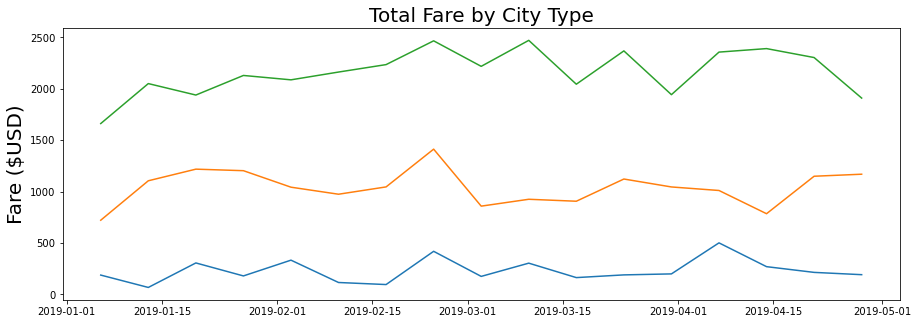

In [22]:
#  16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(resamplebyweek_total_fares_specified_date_df)
ax.set_title("Total Fare by City Type", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=20)
plt.show()

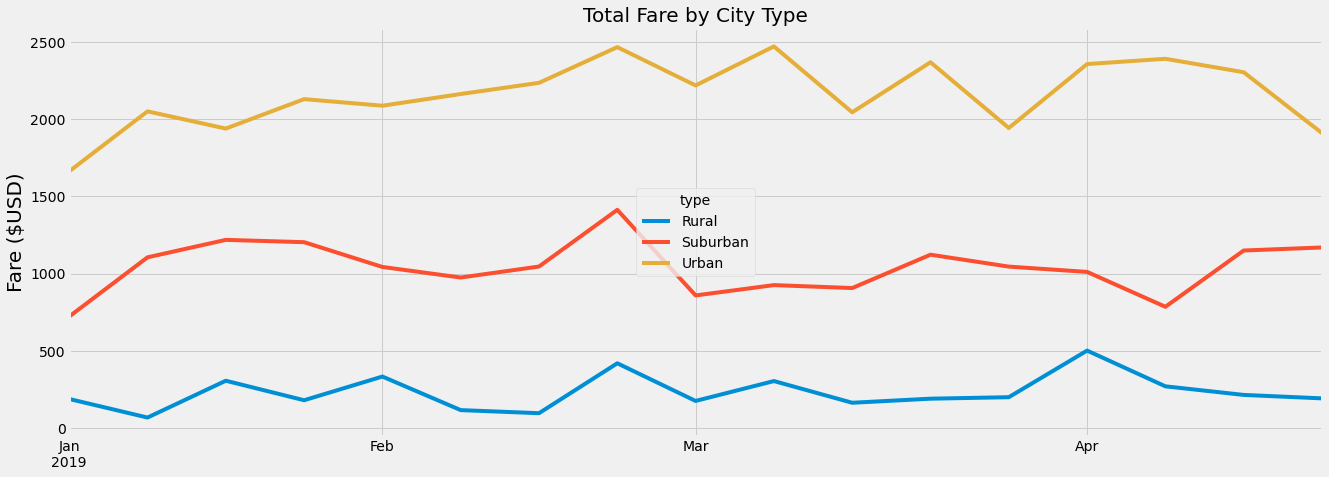

In [23]:
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

resamplebyweek_total_fares_specified_date_df.plot(figsize=(20,7))
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=20)
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()